<a href="https://colab.research.google.com/github/midnightripper/testing/blob/main/Tryithgraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Prerequisite

In [2]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Load the train and test data splits

In [4]:
GER_test = (np.array(sio.loadmat('/content/drive/MyDrive/training data/GER_test.mat')['GER_test'])).transpose()
GER_train = (np.array(sio.loadmat('/content/drive/MyDrive/training data/GER_train.mat')['GER_train'])).transpose()
test_frame = pd.DataFrame(GER_test).sort_values(1)
train_frame = pd.DataFrame(GER_train).sort_values(1)

In [5]:
print(f"x_train shape: {GER_train.shape} - y_train shape: {GER_train.shape}")
print(f"x_test shape: {GER_test.shape} - y_test shape: {GER_test.shape}")

x_train shape: (6981, 21) - y_train shape: (6981, 21)
x_test shape: (6248, 21) - y_test shape: (6248, 21)


In [6]:
def get_data_labels(split):
    x = pd.DataFrame(split)
    labels = x[0].values.astype(np.uint8)
    del x[0],x[1]
    data = x.values 
    return data, labels
    #but why?
    ##to create labels ohhh
x_train, y_train = get_data_labels(train_frame.values.tolist())
x_test, y_test = get_data_labels(test_frame.values.tolist())

In [ ]:
print(y_train[:5])
print(y_train.shape)

[1 0 0 0 1]
(6981,)


In [ ]:
print(x_train[:5])
print(x_train.shape)

[[ 0.04631804  0.14190991  0.08418234  0.38332878  0.13956291  4.50351958
  -1.40879469  6.64747499  0.61780194  0.09405221  0.08239493  0.06977664
   0.02358857  4.42688723 -0.16426972  2.08303284  0.3600657   0.32142857
   0.5       ]
 [ 0.07397126  0.0878519   0.07133727  0.18024259  0.05484237  6.33889059
  -0.64534435  2.39323882  0.38219806  0.04781553  0.04466026  0.07124972
   0.02774154  3.44376844  0.47509284  2.7375382   0.19447861  0.67857143
   0.5       ]
 [ 0.03770867  0.06151615  0.02738048  0.15990569  0.0600172   4.31250852
  -0.65414031  3.28927074  0.18982823  0.071038    0.06528614  0.05745427
   0.01416047  5.0294162  -0.13499718  1.93770483  0.20603255  0.15909091
   0.16853933]
 [ 0.08821136  0.08391754  0.08108698  0.09275925  0.01755766  8.09564386
   0.16275833  1.86848797  0.2671161   0.1004256   0.0960712   0.09572407
   0.0213251   5.22638598  0.23974711  1.93273044  0.30263594  0.27272727
   0.12359551]
 [ 0.06353811  0.06581957  0.06298533  0.06287192  0

In [ ]:
x_new=(x_train-x_train.mean())/x_train.std()
print(x_new[:5])
print(x_new.shape)

[[-0.48415945 -0.43570213 -0.46496532 -0.31332236 -0.43689187  1.77528
  -1.22178351  2.8620914  -0.19446349 -0.4599621  -0.4658714  -0.47226784
  -0.49568145  1.73643362 -0.59091035  0.54828966 -0.32511485 -0.34470074
  -0.25417952]
 [-0.47014151 -0.46310516 -0.47147673 -0.41627057 -0.47983831  2.70566415
  -0.83477615  0.70553892 -0.31389554 -0.48340034 -0.48499981 -0.47152111
  -0.49357623  1.23807218 -0.26680542  0.88007076 -0.40905407 -0.16365829
  -0.25417952]
 [-0.4885237  -0.47645524 -0.49375926 -0.42657973 -0.47721509  1.6784529
  -0.83923499  1.15975438 -0.41141143 -0.47162844 -0.47454417 -0.47851428
  -0.50046073  2.0418669  -0.57607155  0.47462015 -0.40319716 -0.42699276
  -0.42220318]
 [-0.46292294 -0.46509956 -0.46653442 -0.46061753 -0.49873863  3.59619549
  -0.42513367  0.43953282 -0.37223275 -0.45673131 -0.45893863 -0.4591146
  -0.49682884  2.1417146  -0.38610661  0.47209854 -0.35422708 -0.36938834
  -0.44498605]
 [-0.47543027 -0.47427376 -0.47571049 -0.47576798 -0.4980

In [ ]:
# data_augmentation.layers[0].adapt(x_train)

In [ ]:
print(x_train[:5])

[[ 0.04631804  0.14190991  0.08418234  0.38332878  0.13956291  4.50351958
  -1.40879469  6.64747499  0.61780194  0.09405221  0.08239493  0.06977664
   0.02358857  4.42688723 -0.16426972  2.08303284  0.3600657   0.32142857
   0.5       ]
 [ 0.07397126  0.0878519   0.07133727  0.18024259  0.05484237  6.33889059
  -0.64534435  2.39323882  0.38219806  0.04781553  0.04466026  0.07124972
   0.02774154  3.44376844  0.47509284  2.7375382   0.19447861  0.67857143
   0.5       ]
 [ 0.03770867  0.06151615  0.02738048  0.15990569  0.0600172   4.31250852
  -0.65414031  3.28927074  0.18982823  0.071038    0.06528614  0.05745427
   0.01416047  5.0294162  -0.13499718  1.93770483  0.20603255  0.15909091
   0.16853933]
 [ 0.08821136  0.08391754  0.08108698  0.09275925  0.01755766  8.09564386
   0.16275833  1.86848797  0.2671161   0.1004256   0.0960712   0.09572407
   0.0213251   5.22638598  0.23974711  1.93273044  0.30263594  0.27272727
   0.12359551]
 [ 0.06353811  0.06581957  0.06298533  0.06287192  0

In [7]:
input_shape=(19,)
num_classes = 2

In [ ]:
# def create_encoder():
#   model = tf.keras.Sequential()
#   model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(19,)))
#   model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(MaxPooling1D(pool_size=2))
#   model.add(Flatten())
#   model.add(Dense(100, activation='relu'))
#   model.add(Dense(n_outputs, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# encoder = create_encoder()
# encoder.summary()

In [ ]:
print(x_train.shape)

(6981, 19)


##Data Augmentations

###Normalization

In [ ]:
# def norm2(X):
#     temp = X.copy()
#     temp = (temp - np.mean(temp, axis = 0))/np.std(temp, axis = 0)
#     return temp
# x_new=np.zeros(x_train.shape)
# x_new = np.append(x_train, norm2(x_train), axis = 0)
# y_train = np.append(y_train, norm2(y_train), axis = 0)
# x_test = norm2(x_test)

#normalising in a different way

# x_train=(x_train-x_train.mean())/x_train.std()
# print(x_train[:5])
# print(x_train.shape)

#Made accuracy of Cross Entrophy to 44%
#Made accuracy of SupCon to  59.64%
#Normalising the vectors was not a good idea

In [ ]:
from keras.layers import Layer
from keras import backend as K

class Flip(Layer):
    def __init__(self, **kwargs):
        super(Flip, self).__init__(**kwargs)

In [ ]:
# data_augmentation = keras.Sequential(

In [ ]:
def create_encoder_layer(input_size, output_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='relu'))
    return model


In [8]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Input

In [ ]:
class UnitNormLayer(tf.keras.layers.Layer):
    '''Normalize vectors (euclidean norm) in batch to unit hypersphere.
    '''
    def __init__(self):
        super(UnitNormLayer, self).__init__()

    def call(self, input_tensor):
        norm = tf.norm(input_tensor, axis=1)
        return input_tensor / tf.reshape(norm, [-1, 1])

In [9]:
num_classes = 2
input_shape = (19,)

In [ ]:
# # def encoder_net():
# # 	normalization_layer = UnitNormLayer()

# # 	encoder = tf.keras.applications.ResNet50(weights=None, include_top=False)
# # 	encoder.trainable = False

# # 	embeddings = encoder(inputs, training=False)
# # 	embeddings = GlobalAveragePooling2D()(embeddings)
# # 	norm_embeddings = normalization_layer(embeddings)

# # 	encoder_network = Model(inputs, norm_embeddings)

# # 	return encoder_network

# # Projector Network
# def projector_net():
# 	projector=tf.keras.models.Sequential([
# 		Dense(128, activation="relu", trainable=False),
# 		UnitNormLayer()
# 	])
# 	return projector

In [ ]:
def create_encoder():
    layer1=Dense(units=1024,activation='relu')
    layer2=Dense(units=1024,activation='relu')
    layer3=Dense(units=1024,activation='relu')
    layer4=Dense(units=512,activation='relu')
    resnet=Sequential([layer1,layer2,layer3,layer4])
    inputs = keras.Input(shape=input_shape)
    outputs = resnet(inputs)
    outputs = keras.Input(shape=input_shape)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-encoder")
    return model


In [ ]:
inputs = tf.keras.layers.Input(shape=input_shape)
    
    # Define the encoder layers
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    
    # Define the output layer
    outputs = tf.keras.layers.Dense(8, activation='relu')(x)
    
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='encoder')
    
    # Return the model
    return model

In [ ]:
def create_encoder():
    # resnet = keras.applications.ResNet50V2(
    #     include_top=False, weights=None, input_shape=input_shape, pooling="avg"
    # )

    # inputs = keras.Input(shape=x_train[0].shape)
    # # augmented = data_augmentation(inputs)
    # outputs = inputs
    # model = keras.Sequential(name="cifar10-encoder")
    # model.add(inputs)
    # model.add(outputs)
    # return model
    return Encoder(512)


encoder = create_encoder()

NameError: ignored

In [25]:
learning_rate = 0.001
batch_size = 265
hidden_units = 32
projection_units = 128
num_epochs = 100
dropout_rate = 0.5
temperature = 0.05

In [51]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [49]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10-classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

In [12]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 3s 3ms/step - loss: 1.5822 - binary_accuracy: 0.5118
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 1.1838 - binary_accuracy: 0.5048
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.9785 - binary_accuracy: 0.5127
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.8528 - binary_accuracy: 0.5059
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7671 - binary_accuracy: 0.5231
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7144 - binary_accuracy: 0.5386
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7024 - binary_accuracy: 0.5359
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6885 - binary_accuracy: 0.5428
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6773 - binary_accuracy: 0.5610
Epoch 10/100
27/27 [==============================] - 0s 3

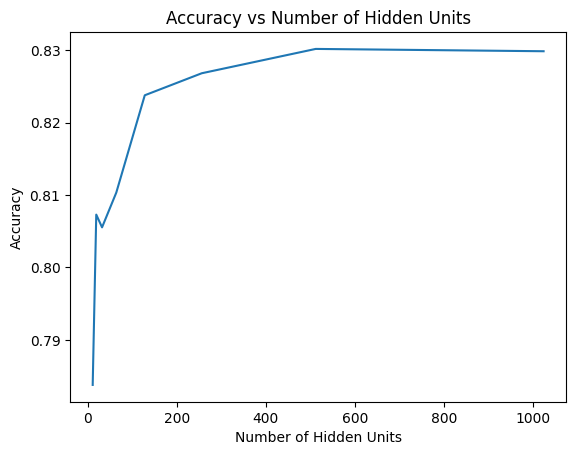

In [17]:
hidden_units = [32, 64, 128]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in hidden_units:
    clf = create_classifier(units)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(hidden_units, accuracies)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Units')
plt.show()

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 [==============================] - 2s 3ms/step - loss: 0.8417 - binary_accuracy: 0.5216
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6932 - binary_accuracy: 0.5631
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6610 - binary_accuracy: 0.6052
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6459 - binary_accuracy: 0.6299
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6220 - binary_accuracy: 0.6621
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6073 - binary_accuracy: 0.6819
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.5832 - binary_accuracy: 0.7081
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5755 - binary_accuracy: 0.7138
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5663 - binary_accuracy: 0.7210
Epoch 10/100
70/70 [==============================] - 0s 3

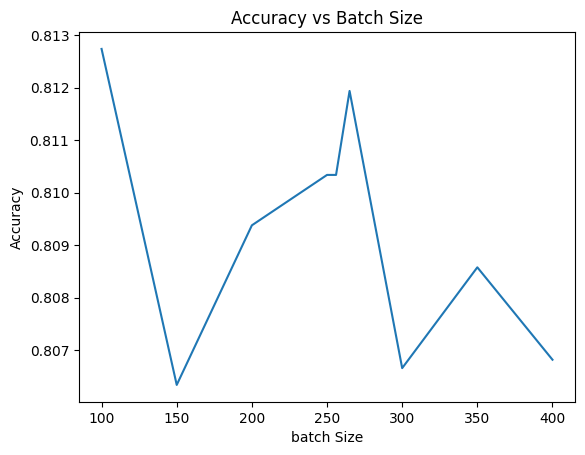

In [20]:
batch_size = [100,150,200,250,256,265,300,350,400]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in batch_size:
    clf = create_classifier(32)
    clf.fit(x=x_train, y=y_train, batch_size=units, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(batch_size, accuracies)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

Epoch 1/100
699/699 [==============================] - 5s 5ms/step - loss: 0.7461 - binary_accuracy: 0.5763
Epoch 2/100
699/699 [==============================] - 2s 3ms/step - loss: 0.6147 - binary_accuracy: 0.6713
Epoch 3/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5818 - binary_accuracy: 0.7134
Epoch 4/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5550 - binary_accuracy: 0.7324
Epoch 5/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5432 - binary_accuracy: 0.7436
Epoch 6/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5394 - binary_accuracy: 0.7522
Epoch 7/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5256 - binary_accuracy: 0.7571
Epoch 8/100
699/699 [==============================] - 1s 2ms/step - loss: 0.5200 - binary_accuracy: 0.7611
Epoch 9/100
699/699 [==============================] - 2s 3ms/step - loss: 0.5176 - binary_accuracy: 0.7589
Epoch 10/100
699/699 [======

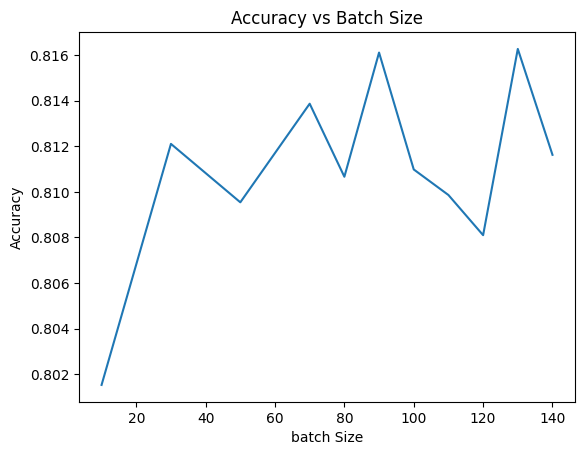

In [21]:
batch_size = [10,30,50,70,80,90,100,110,120,130,140]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in batch_size:
    clf = create_classifier(32)
    clf.fit(x=x_train, y=y_train, batch_size=units, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(batch_size, accuracies)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

Epoch 1/100
27/27 [==============================] - 2s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 8/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 9/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5594
Epoch 10/100
27/27 [==========================

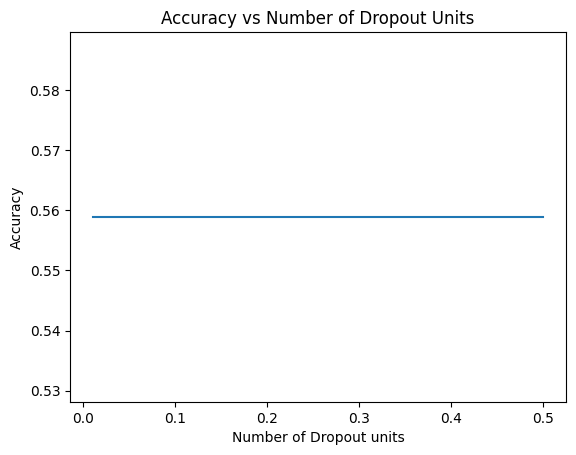

In [27]:
dropout = [0.01,0.05,0.1,0.2,0.3,0.5]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in dropout:
    clf = create_classifier(units)
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(dropout, accuracies)
plt.xlabel('Number of Dropout units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Dropout Units')
plt.show()

In [38]:
# encoder = create_encoder()
classifier = create_classifier()
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=10)

plt.plot(history.history[keras.metrics.BinaryAccuracy()])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Model: "cifar10-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_285 (InputLayer)      [(None, 19)]              0         
                                                                 
 dense_852 (Dense)           (None, 32)                640       
                                                                 
 dropout_568 (Dropout)       (None, 32)                0         
                                                                 
 dense_853 (Dense)           (None, 16)                528       
                                                                 
 dropout_569 (Dropout)       (None, 16)                0         
                                                                 
 dense_854 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-

KeyError: ignored

Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 1.1940 - binary_accuracy: 0.4544
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.8570 - binary_accuracy: 0.4938
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.7769 - binary_accuracy: 0.5108
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.7292 - binary_accuracy: 0.5237
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.7123 - binary_accuracy: 0.5491
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6854 - binary_accuracy: 0.5728
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.5953
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6542 - binary_accuracy: 0.6181
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_accuracy: 0.6406
Epoch 10/50
27/27 [==============================] - 0s

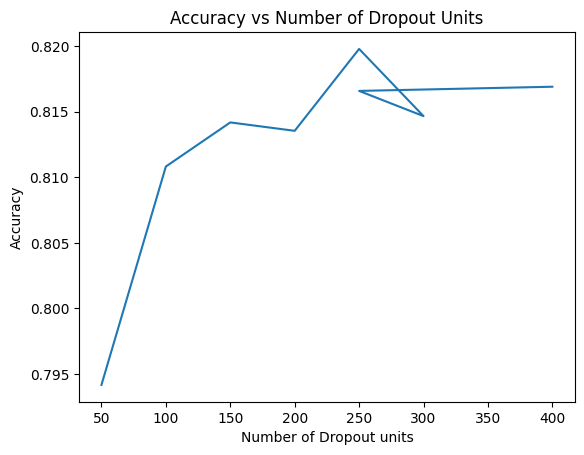

In [40]:
epochs=[50,100,150,200,250,300,250,400]

# Train a binary classification model for each number of hidden units and record the accuracy
accuracies = []
for units in epochs:
    clf = create_classifier()
    clf.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=units)
    accuracy = clf.evaluate(x_test, y_test)[1]
    accuracies.append(accuracy)

# Plot the accuracy as a function of the number of hidden units
plt.plot(epochs, accuracies)
plt.xlabel('Number of Dropout units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Dropout Units')
plt.show()

In [47]:
batch_size = 130
hidden_units = 128
num_epochs = 250
dropout_rate = 0.5

In [52]:
# encoder = create_encoder()
classifier = create_classifier()
classifier.summary()

history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)

accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


Model: "cifar10-classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_300 (InputLayer)      [(None, 19)]              0         
                                                                 
 dense_905 (Dense)           (None, 128)               2560      
                                                                 
 dropout_602 (Dropout)       (None, 128)               0         
                                                                 
 dense_906 (Dense)           (None, 64)                8256      
                                                                 
 dropout_603 (Dropout)       (None, 64)                0         
                                                                 
 dense_907 (Dense)           (None, 1)                 65        
                                                                 
Total params: 10,881
Trainable params: 10,881
No

In [ ]:
accuracy = classifier.evaluate(x_train, y_train)[1]
print(f"Train accuracy: {round(accuracy * 100, 2)}%")

219/219 [==============================] - 0s 2ms/step - loss: 0.4349 - binary_accuracy: 0.8086
Train accuracy: 80.86%


In [ ]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)

In [ ]:
def create_classifier():

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="newloss")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=SupervisedContrastiveLoss(temperature),
        # loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
# encoder = create_encoder()

# encoder_with_projection_head = add_projection_head(encoder)
# encoder_with_projection_head.compile(
#     optimizer=keras.optimizers.Adam(learning_rate),
#     loss=SupervisedContrastiveLoss(temperature),
# )

# encoder_with_projection_head.summary()

# history = encoder_with_projection_head.fit(
#     x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs
# )

In [ ]:
classifier = create_classifier()
classifier.summary()
history = classifier.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=num_epochs)

accuracy = classifier.evaluate(x_test, y_test)[1]
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Model: "newloss"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 19)]              0         
                                                                 
 dense_33 (Dense)            (None, 512)               10240     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 273,922
Trainable params: 273,922
Non-trainab